# Le' Sean  Roberts

# CST 3529 APPLIED METHODS IN MACHINE LEARNING 
## ASSIGNMENT 5 (NEURAL NETWORK)

 ** A Basic Neural Network.
 Applying the common data set Fashion-MNIST to predict the class of an item of clothing among 10 classes, labels (0 to 9). Data stems from the Keras library. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# loading the Fashion-MNIST dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Dimension of the data.
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
# Check for missing data.
print("Missing values in training images:", np.isnan(train_images).any())
print("Missing values in test images:", np.isnan(test_images).any())

Missing values in training images: False
Missing values in test images: False


In [6]:
# Check class distribution.
unique_classes, class_counts = np.unique(train_labels, return_counts = True)
print("class labels:", unique_classes)
print("class_counts:", class_counts)

class labels: [0 1 2 3 4 5 6 7 8 9]
class_counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


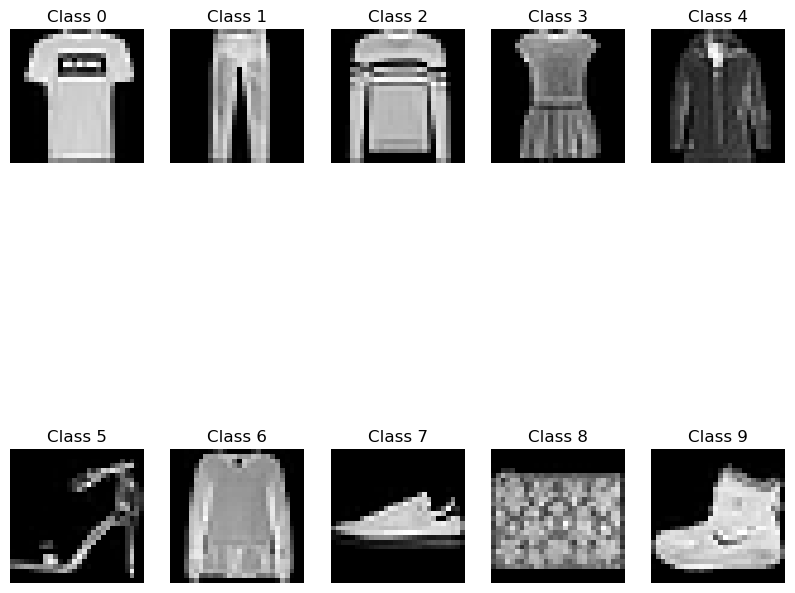

In [7]:
# Display sample images from each class count.
plt.figure(figsize = (10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[train_labels == i][0], cmap = 'gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()

In [8]:
# Preprocessing the data.
# Normalizing the pixel values of the images data. 
# Pixel values ranges from 0 to 255; 0 for black and 255 for white.
# Dividing the pixel values by 255 scales the values to be inthe range 0 to 1;
# Normalization helps improve the training process of NNs by having all pixel values be on the same scale.
# A common preprocessing step when working with images data with neural networks. 
train_images = train_images/255
test_images = test_images/255

In [12]:
# Define the model.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
          # Flatten input images from 2D to 1D.
    tf.keras.layers.Dense(128, activation = 'relu'),
          # Fully connect layer with 128 neurons and ReLU activation.
    tf.keras.layers.Dense(10, activation = 'softmax'),
          # Output layer with 10 neurons (one for each cklass) and softmax activation
])

In [13]:
# Compile the model.
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
# Train the model.
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5002 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3380 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3136 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2810 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2687 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2498 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2

In [15]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8814

Test loss: 0.33862775564193726

Test accuracy: 0.8813999891281128
